In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance

# <h1>1. Polynomial curve fitting, regularization</h1>

We will fit a polynomial to training data and validate our results on a test set. This is a common approach in machine learning to test if your model generalizes well. You will get an idea of what overfitting is and how the size of the training set influences this phenomenon.
Note: You should check another file on BrightSpace (A0 supplement) which demonstrates some of the plots that you should generate in this task along with additional information on the problem. Consider the function:
y(x) = 0.5 + 0.4sin(2*pi*x); for x in [0; 1].

<h4>I. Use this function to generate two noisy sets of n points (train and test) that will be used for modeling y, for n = 9, 15, 100. The x-coordinates should be uniformly (at random) distributed over [0, 1], y-coordinates should be contaminated with Gaussian noise with mu = 0; sigma = 0:05.
Hint: You can use the numpy.random.uniform and numpy.random.normal functions.</h4>

In [10]:
#calc_y(x_list)
#Input: List of independent variables (x)
#Output: List of dependent variables (y) for given function and with added Gaussian noise
def calc_y(x_list):
  y=[((0.5+(0.4*math.sin(x*2*math.pi)))+np.random.normal(0,0.05)) for x in x_list]
  return y

dict={} # Dictionary for storing training and testing values of x,y 
i=0
for n in [9,15,100]:
  dict["x_test{0}".format(n)]=np.random.uniform(0,1,n) #Get uniformly distributed values for test set of x
  dict["x_train{0}".format(n)]=np.random.uniform(0,1,n) #Get uniformly distributed values for training set of x
  dict["y_test{0}".format(n)]=calc_y(dict["x_test{0}".format(n)]) #Get test set for y
  dict["y_train{0}".format(n)]=calc_y(dict["x_train{0}".format(n)]) #Get training set for y  

<h4>II. Find the best polynomial approximation of degree d (d = 0, 1, ..., 9)
of the training set and plot the results.
Hint: check the numpy.polyfit and numpy.polyval functions</h4>

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


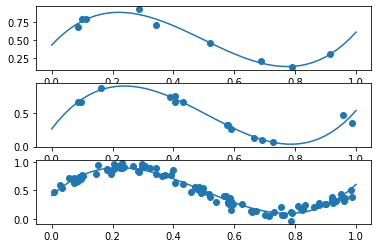

In [11]:
#Scatter plot the data points
fig,axs=plt.subplots(3)
axs[0].scatter(dict["x_train9"],dict["y_train9"])
axs[1].scatter(dict["x_train15"],dict["y_train15"])
axs[2].scatter(dict["x_train100"],dict["y_train100"])

coeffs={} #Dictionary for storing the coefficients retured by polyfit function

#For each data set, fit functions of degree 'd'
for d in range(0,10):
  coeffs["n9_d{0}".format(d)] = np.polyfit(dict["x_train9"], dict["y_train9"],d)
  coeffs["n15_d{0}".format(d)] = np.polyfit(dict["x_train15"], dict["y_train15"],d)
  coeffs["n100_d{0}".format(d)] = np.polyfit(dict["x_train100"], dict["y_train100"],d)

#Check for the best fit by setting 'd' to different values
d=3

#Plot the polynomial for each fit
new_x = np.linspace(0, 1)
axs[0].plot(new_x,np.polyval(coeffs["n9_d{0}".format(d)],new_x))
axs[1].plot(new_x,np.polyval(coeffs["n15_d{0}".format(d)],new_x))
axs[2].plot(new_x,np.polyval(coeffs["n100_d{0}".format(d)],new_x))


III. Generate 3 plots (one for each value of n) that demonstrate the approximation error (MSE) on the train and test sets as a function of the polynomial degree. Generates all these 3*10 + 3 figures.

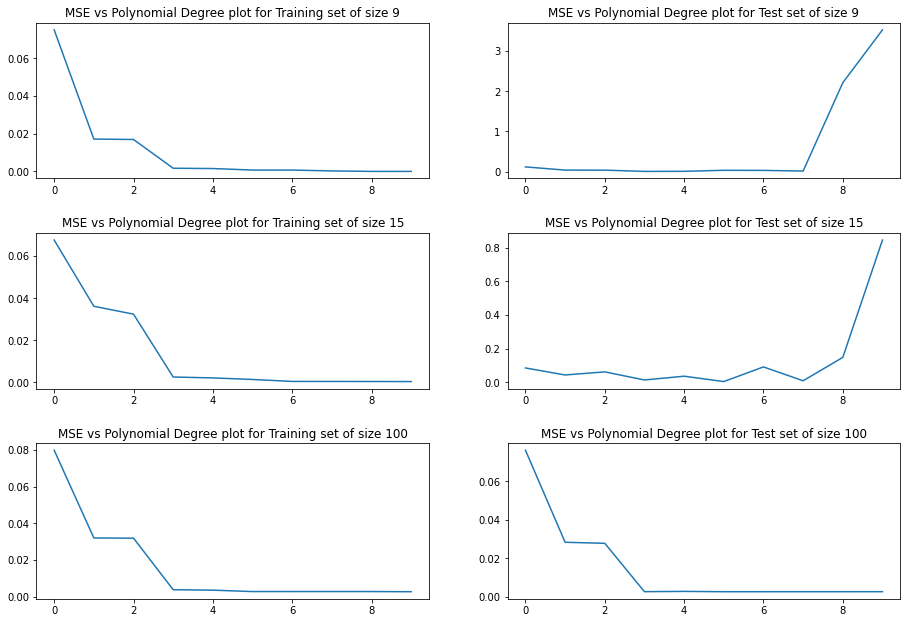

In [12]:
#Function mse(y_real, y_pred,n)
#Input: List of y values, List of predicted y values, number of data points 'n'
#Output: returns Mean Squared Error
def mse(y_real,y_pred,n):
  sum=0
  for i in range (n):
    sum+=(y_pred[i]-y_real[i])**2
  return sum/n

error_dict_train={} #Dictionary for storing Mean Squared Error for Training Set
error_dict_test={} #Dictionary for storing Mean Squared Error for Test Set

#For each data set (of sizes 'n'), calculate Mean Squared Error for Training and Test sets
for n in [9,15,100]:
  error_dict_train["error_n{0}".format(n)] = []
  error_dict_test["error_n{0}".format(n)] = []
  for d in range(0,10):
    error_dict_train["error_n{0}".format(n)].append(mse(dict["y_train{0}".format(n)], np.polyval(coeffs["n{0}_d{1}".format(n,d)], dict["x_train{0}".format(n)]),n))
    error_dict_test["error_n{0}".format(n)].append(mse(dict["y_test{0}".format(n)], np.polyval(coeffs["n{0}_d{1}".format(n,d)], dict["x_test{0}".format(n)]),n))

#Plot MSE as a function of degree
d = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig,axs=plt.subplots(3,2)
axs[0,0].plot(d, error_dict_train["error_n9"]) #Training set of size 9
axs[0,0].set_title("MSE vs Polynomial Degree plot for Training set of size 9")
axs[1,0].plot(d, error_dict_train["error_n15"]) #Training set of size 15
axs[1,0].set_title("MSE vs Polynomial Degree plot for Training set of size 15")
axs[2,0].plot(d, error_dict_train["error_n100"]) #Training set of size 100
axs[2,0].set_title("MSE vs Polynomial Degree plot for Training set of size 100")
axs[0,1].plot(d, error_dict_test["error_n9"]) #Test set of size 9
axs[0,1].set_title("MSE vs Polynomial Degree plot for Test set of size 9")
axs[1,1].plot(d, error_dict_test["error_n15"]) #Test set of size 15
axs[1,1].set_title("MSE vs Polynomial Degree plot for Test set of size 15")
axs[2,1].plot(d, error_dict_test["error_n100"]) #Test set of size 100
axs[2,1].set_title("MSE vs Polynomial Degree plot for Test set of size 100")
plt.subplots_adjust(left=1,bottom=1,right=3, top=3, wspace=0.2,hspace=0.35)
plt.show()


<h4>IV. You should see that higher degree polynomials can fit well to the training data, but can have problems to generalize to the test data when there is only a small number of samples. This is called overfitting. One way to avoid this is to enforce the absolute values of our model parameters, the coefficients of the polynomial, to be relatively small. One option is to add the sum of squared coefficients of  to the error function. Here lambda is a tunable parameter that controls the penalty for coefficients that have exceedingly large values. Think, or search in the literature, how to minimize the error function including the regularization term. You should also look up the sklearn.linear_model.Ridge function.</h4>

In [ ]:
error_n9_ridge_train = []
error_n9_ridge_test = []

X_train=dict["x_train9"]
X_test=dict["x_test9"]
y_train=dict["y_train9"]
y_test=dict["y_test9"]

X_train_transposed = []
for i in range(len(X_train)):
  X_train_transposed.append([])
  X_train_transposed[i].append(X_train[i])

X_test_transposed = []
for i in range(len(X_test)):
  X_test_transposed.append([])
  X_test_transposed[i].append(X_test[i])

clf = Ridge(alpha=1.0)
print(X_train_transposed, y_train)
clf.fit(X_train_transposed, y_train)

error_n9_ridge_train.append(mse(dict["y_train9"], clf.predict(X=X_train_transposed),9))
error_n9_ridge_test.append(mse(dict["y_test9"], clf.predict(X=X_test_transposed),9))



[[0.5104983228967881], [0.006170367732423188], [0.7419729631656202], [0.9011526225865301], [0.5168775167521118], [0.5707619365600846], [0.6802362708947859], [0.04414421580534589], [0.9426174608776154]] [0.4829654797645963, 0.4283415914125739, 0.12471752394633488, 0.21219951280364102, 0.5063905592057214, 0.34825538106724524, 0.17480733488551578, 0.5490689392426618, 0.2886015513256387]


<h1>2. High Dimensional Spaces</h1>

<p>This task will help you to develop some intuitions about shapes in high dimensional spaces. Some of the results are counter-intuitive and this is a valuable skill that will help you understand more advanced concepts later on in the course.</p>
<p>Consider a unit cube in n-dimensional space Un = [0,1]^n, and an n-
dimensional unit ball Bn that is included in Un:</p>
<p>Bn = { (x1,x2,...,xn) | (x1 −0.5)^2 + (x2 −0.5)^2 + ...+ (xn −0.5)^2 < 0.5^2} (1)</p>
<p>for n = 1,2,...,100:</p>

<h4>I. Find the number of vertices (”corners”) of Un, Corners(n).</h4>

<p>The number of vertices of a unit cube in the n-dimensional space Un grows exponentially with respect to the number of fimensions n:</p>
<p>Corners(n) = 2^n</p>

Text(0.5, 1.0, 'Variation of the number of vertices of a unit cube with respect to the number of dimensions in the space')

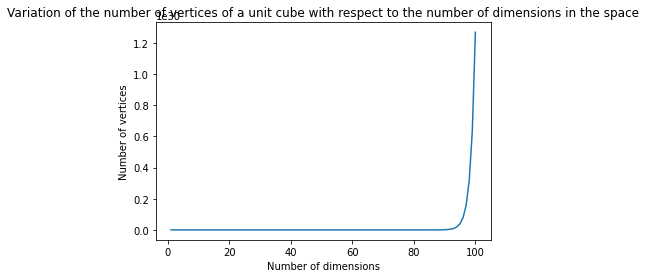

In [ ]:
def corners(n):
  return 2**n

dimensions = []
no_corners = []

for n in range(1, 101):
  dimensions.append(n)
  no_corners.append(corners(n))

#print(no_corners)

plt.plot(dimensions, no_corners)
plt.xlabel("Number of dimensions")
plt.ylabel("Number of vertices")
plt.title("Variation of the number of vertices of a unit cube with respect to the number of dimensions in the space")

<h4>II. Calculate the length of the longest diagonal of Un, DiagU(n).</h4>
 
<p>The longest diagonal of a unit cube in the n-dimensional space Un has the following formula:</p>

<p>DiagU(n) = sqrt(n)</p>

Text(0.5, 1.0, 'Variation of the length of the longest diagonal of a unit cube with respect to the number of dimensions in the space')

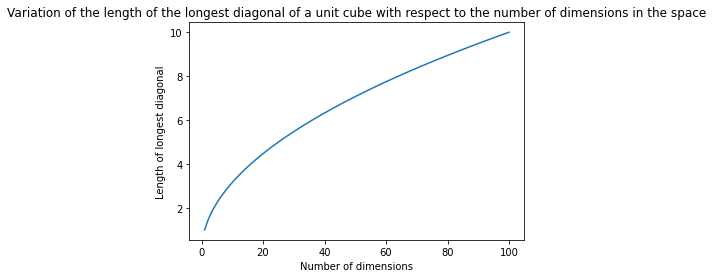

In [ ]:
def diag_u(n):
  return math.sqrt(n)

longest_diag = []

for n in dimensions:
  longest_diag.append(diag_u(n))

plt.plot(dimensions, longest_diag)
plt.xlabel("Number of dimensions")
plt.ylabel("Length of longest diagonal")
plt.title("Variation of the length of the longest diagonal of a unit cube with respect to the number of dimensions in the space")

<h4>III. What is the volume of Bn and how does it change as the number of
dimensions increases? Estimating it is not entirely straightforward (you
can look up the formula and implement it if you wish). However you
can approximate this procedure by generating random points, uniformly
distributed within Un (points = rand(10^6, n)) and checking what percentage
of them are contained within Bn.</h4>

<p>Because it takes a long time to generate and check so many points, we decided to calculate this percentage only for the values n = 2,4,8,....,1024.</p>

In [ ]:
dimensions_reduced = []
percentage=[]

for x in range(1,11):
  dimensions_reduced.append(2**x)
  points_inside=0 #counter of the randomly generated points that are in Bn
  sample=np.random.uniform(-0.5, 0.5,size=(1000000,2**x))
  print(sample)

  #checking if a point is in Bn
  for i in range(len(sample)):
    sum = 0
    for j in range(2**x):
      sum += (sample[i][j] - 0.5)**2
    if sum < 0.5**2:
      points_inside += 1
  
  percentage.append(points_inside/1000000)
  print (percentage)

[[-0.15669618 -0.31697848]
 [ 0.1452421  -0.38809813]
 [-0.1855847  -0.21253307]
 ...
 [-0.28162357  0.03429861]
 [ 0.33502526  0.3114185 ]
 [-0.10215552  0.00558622]]
[0.196541]
[[-0.18458608  0.32117761  0.1341865   0.07660087]
 [-0.29543048  0.35412926 -0.27912928 -0.46462918]
 [ 0.48269602 -0.15558137  0.42950576  0.23329881]
 ...
 [-0.17637989  0.25304122 -0.19955934  0.12759283]
 [ 0.11417317 -0.41856235 -0.00596483 -0.39267183]
 [-0.39705508 -0.1124736  -0.2266326  -0.15186682]]
[0.196541, 0.019271]
[[ 0.35455466  0.11384359  0.43437746 ...  0.27071043  0.06416884
   0.2774907 ]
 [ 0.43323569 -0.24761495 -0.33723278 ... -0.39232489  0.08264844
  -0.20931349]
 [ 0.21888843 -0.21944936  0.30862621 ... -0.18006524 -0.19894305
   0.07708239]
 ...
 [ 0.4256467   0.08193576 -0.07714081 ...  0.42037235 -0.12519572
   0.16156594]
 [ 0.39742001  0.32256034  0.31682561 ... -0.16411875  0.4804054
   0.4976446 ]
 [-0.00774842  0.17198902 -0.0577676  ...  0.12369921 -0.34897205
   0.09839476

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


Text(0.5, 1.0, 'Precentage of the volume of Un corresponding to Bn with respect to the number of dimensions in the space')

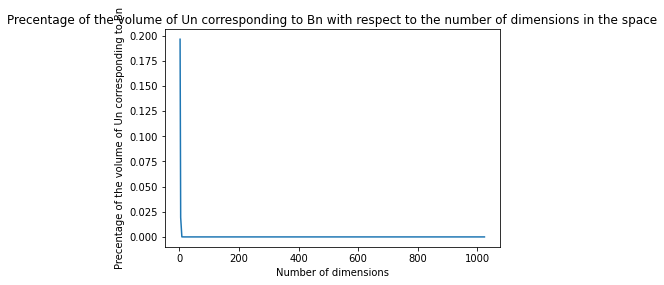

In [ ]:
print(dimensions_reduced)
plt.plot(dimensions_reduced, percentage)
plt.xlabel("Number of dimensions")
plt.ylabel("Precentage of the volume of Un corresponding to Bn")
plt.title("Precentage of the volume of Un corresponding to Bn with respect to the number of dimensions in the space")

<h4>IV. Calculate the volume of the ”0.01-skin” of Un: VolumeS(n) = 1^n − (1 − 2∗0.01)^n</h4>

Text(0.5, 1.0, 'Variation of the volume of the 0.01-skin of Un with respect to the number of dimensions in the space')

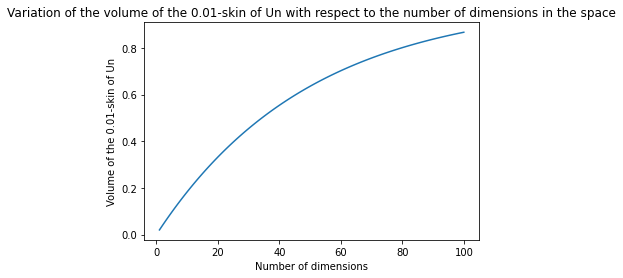

In [ ]:
def volume_s(n):
  return 1**n - (1 - 2*0.01)**n

volumes=[]

for n in dimensions:
  volumes.append(volume_s(n))

plt.plot(dimensions, volumes)
plt.xlabel("Number of dimensions")
plt.ylabel("Volume of the 0.01-skin of Un")
plt.title("Variation of the volume of the 0.01-skin of Un with respect to the number of dimensions in the space")

<h4>V. For n = 2, 4, 8, ...., 1024 generate 1000 points in Un, uniformly distributed, find distances between all pairs of these points, and produce a histogram of these distances.</h4>

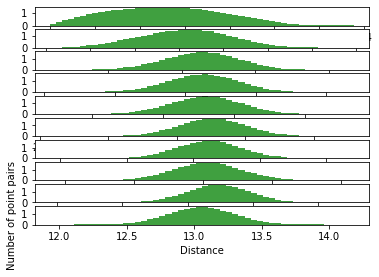

In [ ]:
dimensions_reduced = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

fig,axs=plt.subplots(10)

for i in range(len(dimensions_reduced)):
  n = dimensions_reduced[i]

  #generate 1000 random points in Un
  sample=np.random.uniform(-0.5, 0.5,size=(1000,n))
  
  distances=[]

  #iterate through all the pairs of points and measure the distance
  for j in range(1000):
    for k in range(j+1, 1000):
      distances.append(distance.euclidean(sample[j], sample[k]))

  # the histogram of the data
  axs[i].hist(distances, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel("Distance")
plt.ylabel("Number of point pairs")
plt.show()